# Epithelium

### graph / dataframe interface


## I/O

- hdf_snapshot


## topology

### graphs

- full graph
- cells graph
- junctions graph

### dataframes

- vertex df
- edge df
- triangles

### actions

- add vertex
- add cell
- add junction
- remove cell
- remove junction




## geometry

- position
- height / area / volume


## dynamics

- energy
- gradient
- optimisation
  + local
  + global


## filters

- cell vertices
- junction edges
- local
- active

## events

- division
- T1
- T3
- apoptosis


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import pandas as pd
import graph_tool.all as gt
from scipy import optimize

from leg_joint.epithelium import Epithelium

import leg_joint as lj


/home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/graph_tool/draw/cairo_draw.py:1318: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [2]:
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
eptm = Epithelium()



2015-05-12 09:38:48,845 -leg_joint.epithelium.epithelium -__init__ -- INFO -Instanciating epithelium 0
2015-05-12 09:38:48,846 -leg_joint.epithelium.epithelium -__init__ -- INFO -Created new graph
2015-05-12 09:38:48,923 -leg_joint.epithelium.generation -reorient_edges -- INFO -filpped 391 edges
2015-05-12 09:38:49,047 -leg_joint.epithelium.epithelium -__init__ -- INFO -Update geometry
2015-05-12 09:38:49,112 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial cells
2015-05-12 09:38:49,113 -leg_joint.epithelium.epithelium -__init__ -- INFO -Initial junctions
2015-05-12 09:38:49,332 -leg_joint.epithelium.epithelium -__init__ -- INFO -Isotropic relaxation


In [4]:
eptm.graph.get_fast_edge_removal()

False

In [8]:
eptm.isotropic_relax()

In [9]:

eptm.calc_energy(full_output=False) / eptm.norm_factor

57.916929140937988

In [7]:
from leg_joint.dynamics import optimizers

In [7]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
out = optimizers.find_energy_min(eptm)

ValueError: failed to initialize intent(inout) array -- input 'O' not compatible to 'd'

In [11]:
optimizers.check_local_grad(eptm)

2015-05-12 09:39:18,350 -leg_joint.dynamics.optimizers -check_local_grad -- INFO -Checking gradient


0.35246685680695461

In [12]:
eptm.delta_o

0.88659268738738983

In [44]:
eptm.vertex_df.vol.head()

vertex_index
0               70.567209
1                0.000000
2                0.000000
3               70.567209
4                0.000000
Name: vol, dtype: float64

In [45]:
eptm.vertex_df.height.head()

vertex_index
0               21.278224
1               21.417927
2               21.417927
3               21.278224
4               21.417927
Name: height, dtype: float64

In [46]:
eptm.update_geometry()

In [47]:
eptm.edge_df.dtypes

dx                  float64
dy                  float64
dz                  float64
edge_length         float64
gx                  float64
gy                  float64
gz                  float64
is_junction_edge      uint8
line_tension        float64
line_tensions       float64
radial_tension      float64
dtype: object

In [48]:
eptm.faces.dtypes

uz          float64
ux          float64
sub_area    float64
height       object
uy          float64
ell_ij      float64
dtype: object

In [49]:
eptm.faces.sub_area

cell  jv_i  jv_j
0     1     25      1.325423
      23    24      1.325423
      24    25      0.665559
3     2     27      1.325423
      4     28      1.325423
      27    28      0.665559
6     5     30      1.325423
      7     31      1.325423
      30    31      0.665559
9     8     33      1.325423
      10    34      1.325423
      33    34      0.665559
12    11    36      1.325423
      13    37      1.325423
      36    37      0.665559
...
153   129   130     0.665559
            152     1.325423
      130   154     1.325423
156   132   133     0.665559
            155     1.325423
      133   157     1.325423
159   135   136     0.665559
            158     1.325423
      136   160     1.325423
162   138   139     0.665559
            161     1.325423
      139   163     1.325423
165   141   142     0.665559
            164     1.325423
      142   166     1.325423
Name: sub_area, Length: 288, dtype: float64

In [50]:
eptm.params

{'cell_volume': 288.0,
 'contractility': 276.48,
 'elasticity': 1.0,
 'lambda_0': 4.3,
 'line_tension': 2873.2644436598594,
 'n_sigmas': 8,
 'n_zeds': 7,
 'pos_cutoff': 0.0001,
 'pos_noise': 0.01,
 'prefered_area': 12.0,
 'prefered_height': 24.0,
 'radial_tension': 0.0,
 'rho0': 13.0,
 'rho_lumen': -11.0,
 'theta_cutoff': 0.01,
 'vol_elasticity': 1.0}

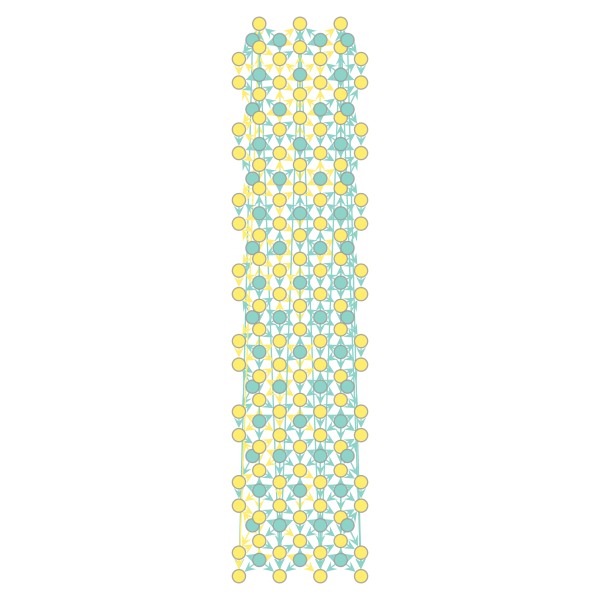

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fb822e66128, at 0x7fb822ecb4e0>

In [52]:
sigma = eptm.theta.copy()

is_junction_vert = eptm.is_cell_vert.copy()
is_junction_vert.a = 1 - is_junction_vert.a

sigma.a = eptm.rho.a * eptm.theta.a
pos = gt.group_vector_property([eptm.z, sigma])
gt.graph_draw(eptm.graph, pos=pos,
              edge_color=eptm.is_junction_edge,
              vertex_fill_color=is_junction_vert, inline=True)

In [10]:
print(eptm)

<Epithelium with 56 cells and 152 junction edges at 0x7f96bcdf6358>
Identifier : 0_2015-03-26T15_14_57
Directory : /tmp/0


In [11]:
eptm.params


{'cell_volume': 288.0,
 'contractility': 276.48,
 'elasticity': 1.0,
 'lambda_0': 4.3,
 'line_tension': 2873.2644436598594,
 'n_sigmas': 8,
 'n_zeds': 7,
 'pos_cutoff': 0.0001,
 'pos_noise': 0.01,
 'prefered_area': 12.0,
 'prefered_height': 24.0,
 'radial_tension': 0.0,
 'rho0': 13.0,
 'rho_lumen': -11.0,
 'theta_cutoff': 0.01,
 'vol_elasticity': 1.0}

In [13]:
import hdfgraph

In [14]:
eptm.update_geometry()
hdfgraph.update_pmaps(eptm.graph, eptm.vertex_df, eptm.edge_df)

In [16]:
eptm.vertex_df.dtypes

theta               float64
z                   float64
x                   float64
y                   float64
is_cell_vert          int64
is_active_vert        int64
rho                 float64
area                float64
height              float64
vol                   int64
contractilities       int64
num_sides             int64
perimeters          float64
vol_elasticities      int64
radial_tensions     float64
dtype: object

In [17]:
eptm.edge_df.dtypes

is_junction_edge      uint8
edge_length         float64
dx                  float64
dy                  float64
line_tensions       float64
dz                  float64
dtype: object

In [18]:
np.bool

bool

In [15]:
eptm.graph.list_properties()

vol            (vertex)  (type: int64_t)
is_cell_vert   (vertex)  (type: int64_t)
perimeters     (vertex)  (type: int64_t)
vol_elasticities (vertex)  (type: int64_t)
area           (vertex)  (type: int64_t)
z              (vertex)  (type: double)
x              (vertex)  (type: double)
theta          (vertex)  (type: double)
is_active_vert (vertex)  (type: int64_t)
height         (vertex)  (type: int64_t)
y              (vertex)  (type: double)
num_sides      (vertex)  (type: int64_t)
contractilities (vertex)  (type: int64_t)
radial_tensions (vertex)  (type: double)
rho            (vertex)  (type: int64_t)
is_junction_edge (edge)    (type: bool)
dx             (edge)    (type: int64_t)
edge_length    (edge)    (type: int64_t)
dz             (edge)    (type: int64_t)
line_tensions  (edge)    (type: double)
dy             (edge)    (type: int64_t)


In [14]:
288/9

32.0

In [5]:
eptm.vertex_df.is_cell_vert

vertex
0         1
1         0
2         0
3         1
4         0
5         0
6         1
7         0
8         0
9         1
10        0
11        0
12        1
13        0
14        0
...
489       1
490       0
491       0
492       1
493       0
494       0
495       1
496       0
497       0
498       1
499       0
500       0
501       1
502       0
503       0
Name: is_cell_vert, Length: 504, dtype: int64

In [6]:
eptm.graph.vertex_properties['is_cell_vert']

<PropertyMap object with key type 'Vertex' and value type 'int64_t', for Graph 0x7f251f1b0c18, at 0x7f251f12e128, with values:
[1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0

In [7]:
eptm.is_cell_vert.a

PropertyArray([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
    

In [17]:
import hdfgraph

In [18]:
hdfgraph.complete_pmaps(graph, vertex_df, edge_df)
hdfgraph.update_pmaps(graph, vertex_df, edge_df)


In [6]:
eptm.graph.vertex_properties['is_cell_vert']

<PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7f049f8cd5f8, at 0x7f049f8cdb00, with values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [19]:
graph.list_properties()

z              (vertex)  (type: double)
theta          (vertex)  (type: double)
y              (vertex)  (type: double)
x              (vertex)  (type: double)
is_cell_vert   (vertex)  (type: int64_t)
is_active_vert (vertex)  (type: int64_t)
is_junction_edge (edge)    (type: bool)


In [4]:
eptm.graph.list_properties()

radial_tensions (vertex)  (type: double)
is_cell_vert   (vertex)  (type: bool)
is_alive       (vertex)  (type: bool)
is_local_vert  (vertex)  (type: bool)
is_active_vert (vertex)  (type: bool)
is_junction_edge (edge)    (type: bool)
line_tensions  (edge)    (type: double)
is_local_edge  (edge)    (type: bool)
is_new_edge    (edge)    (type: bool)
is_ctoj_edge   (edge)    (type: bool)
at_boundary    (edge)    (type: bool)
is_active_edge (edge)    (type: bool)


In [1]:
%pdb

Automatic pdb calling has been turned ON


In [8]:
eptm.graph.vertex_properties['heights'].fa.dtype

KeyError: ('v', 'heights')

> /home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/graph_tool/__init__.py(1689)<lambda>()
   1688         return PropertyDict(self, self.__get_specific_properties("v"),
-> 1689                             lambda g, k: g.__properties[("v", k)],
   1690                             lambda g, k, v: g.__set_property("v", k, v),

ipdb> c


In [9]:
eptm.is_cell_vert

<PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7fe09da0bc88, at 0x7fe09da0be10, with values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Object `gt.edge_difference` not found.
